In [1]:
import torch
import transformers

import torchtrail

/Users/arakhmati/github/torchtrail/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "google/vit-base-patch16-224"
config = transformers.ViTConfig.from_pretrained(model_name)

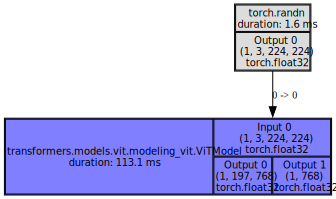

In [3]:
batch_size = 1
num_channels = 3
height = 224
width = 224

config = transformers.ViTConfig.from_pretrained(model_name)
model = transformers.models.vit.modeling_vit.ViTModel(config).eval()

with torchtrail.trace():
    input_tensor = torch.randn(batch_size, num_channels, height, width)
    output = model(input_tensor).pooler_output

torchtrail.visualize(output, max_depth=1)

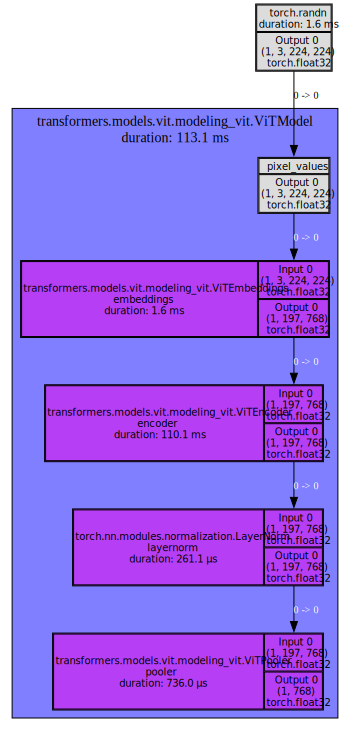

In [4]:
torchtrail.visualize(output, max_depth=2)

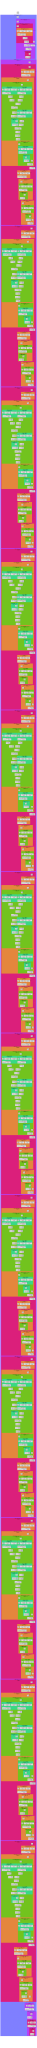

In [5]:
torchtrail.visualize(output)

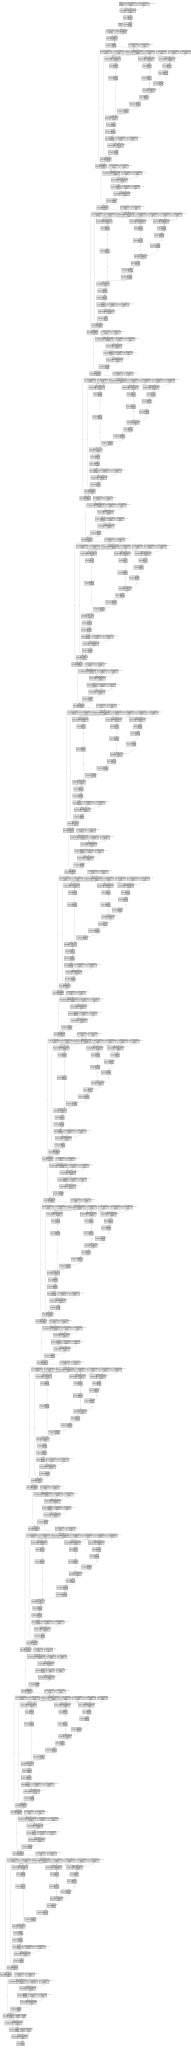

In [6]:
torchtrail.visualize(output, show_modules=False)

In [7]:
print(torchtrail.codegen(output, top_level_name="vit"))

def Conv2d_embeddings_patch_embeddings_projection(config, input, *, parameters):
    variable_0 = parameters.weight    # shapes: (768, 3, 16, 16), dtypes: torch.float32
    variable_1 = parameters.bias    # shapes: (768,), dtypes: torch.float32
    variable_2 = torch.conv2d(input, variable_0, variable_1, [16, 16], [0, 0], [1, 1], 1)    # shapes: (1, 768, 14, 14), dtypes: torch.float32; duration: 582.0 µs
    return variable_2

def ViTPatchEmbeddings_embeddings_patch_embeddings(config, pixel_values, *, parameters):
    variable_0 = Conv2d_embeddings_patch_embeddings_projection(config, input=pixel_values, parameters=parameters.projection)    # shapes: (1, 768, 14, 14), dtypes: torch.float32; duration: 726.0 µs
    variable_1 = torch.Tensor.flatten(variable_0, 2)    # shapes: (1, 768, 196), dtypes: torch.float32; duration: 29.1 µs
    variable_2 = torch.Tensor.transpose(variable_1, 1, 2)    # shapes: (1, 196, 768), dtypes: torch.float32; duration: 24.1 µs
    return variable_2

def Dropou